# Procesamiento y Análisis de Imágenes de Tablas Estructuradas

Este notebook presenta un flujo de trabajo integral para el procesamiento de imágenes de tablas estructuradas. Utilizando técnicas avanzadas de visión por computadora y aprendizaje automático, el documento abarca desde la detección y extracción de celdas individuales hasta la interpretación y visualización de datos. Los puntos clave incluyen:

* Detección de Celdas: Aplicación de algoritmos para identificar y delinear celdas dentro de una tabla en imágenes.
* Ordenamiento y Numeración: Métodos para ordenar las celdas detectadas y numerarlas basándose en su posición dentro de la tabla.
* Extracción y Visualización de Datos: Extracción de imágenes individuales de celdas específicas para un análisis más detallado, y visualización efectiva de las mismas.
* Automatización y Funcionalidad Personalizada: Implementación de funciones personalizadas para mejorar la automatización del proceso y facilitar la extracción de datos a demanda.
* Optimización de Visualización: Ajustes en la presentación de imágenes para maximizar la claridad y legibilidad de los datos extraídos.

El objetivo del notebook es proporcionar una referencia útil para la manipulación y análisis de tablas en imágenes, sirviendo como una herramienta para tareas de digitalización de documentos, reconocimiento óptico de caracteres (OCR), y aplicaciones de análisis de datos. Cada paso está documentado detalladamente para facilitar la comprensión y la replicación del proceso en futuros proyectos.

## Paquetes requeridos

In [7]:
#cv2
!pip install opencv-python-headless 

  Obtaining dependency information for opencv-python-headless from https://files.pythonhosted.org/packages/e3/10/31b27a7473043eb5317f698ede00e7e129b2de378903bfe0bb4d785a7baf/opencv_python_headless-4.8.1.78-cp37-abi3-win_amd64.whl.metadata
  Using cached opencv_python_headless-4.8.1.78-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python_headless-4.8.1.78-cp37-abi3-win_amd64.whl (38.0 MB)



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\nicoc\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## importacion codigo trabajado

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('./src/segmentation/')
sys.path.append('./src/data_management/')
sys.path.append('./src/validation_modules/')

import image_processor  # Importa tu módulo
import telegrama  # Importa tu módulo
import template  # Importa tu módulo

import election_data_downloader

import telegram_validator

## Carga de ejemplo a procesar

In [10]:
import numpy as np
from image_processor import ImageProcessor

FOLDER = "./files-examples/"
FILE_TELEGRAM_TEMPLATE = "generales_telegrama_01"
FILE_TELEGRAM = "0100100004X"

# Uso de la clase
processor = ImageProcessor(f"{FOLDER}{FILE_TELEGRAM_TEMPLATE}.png", f"{FOLDER}{FILE_TELEGRAM}.tiff")

is_align = processor.read_and_align_images()


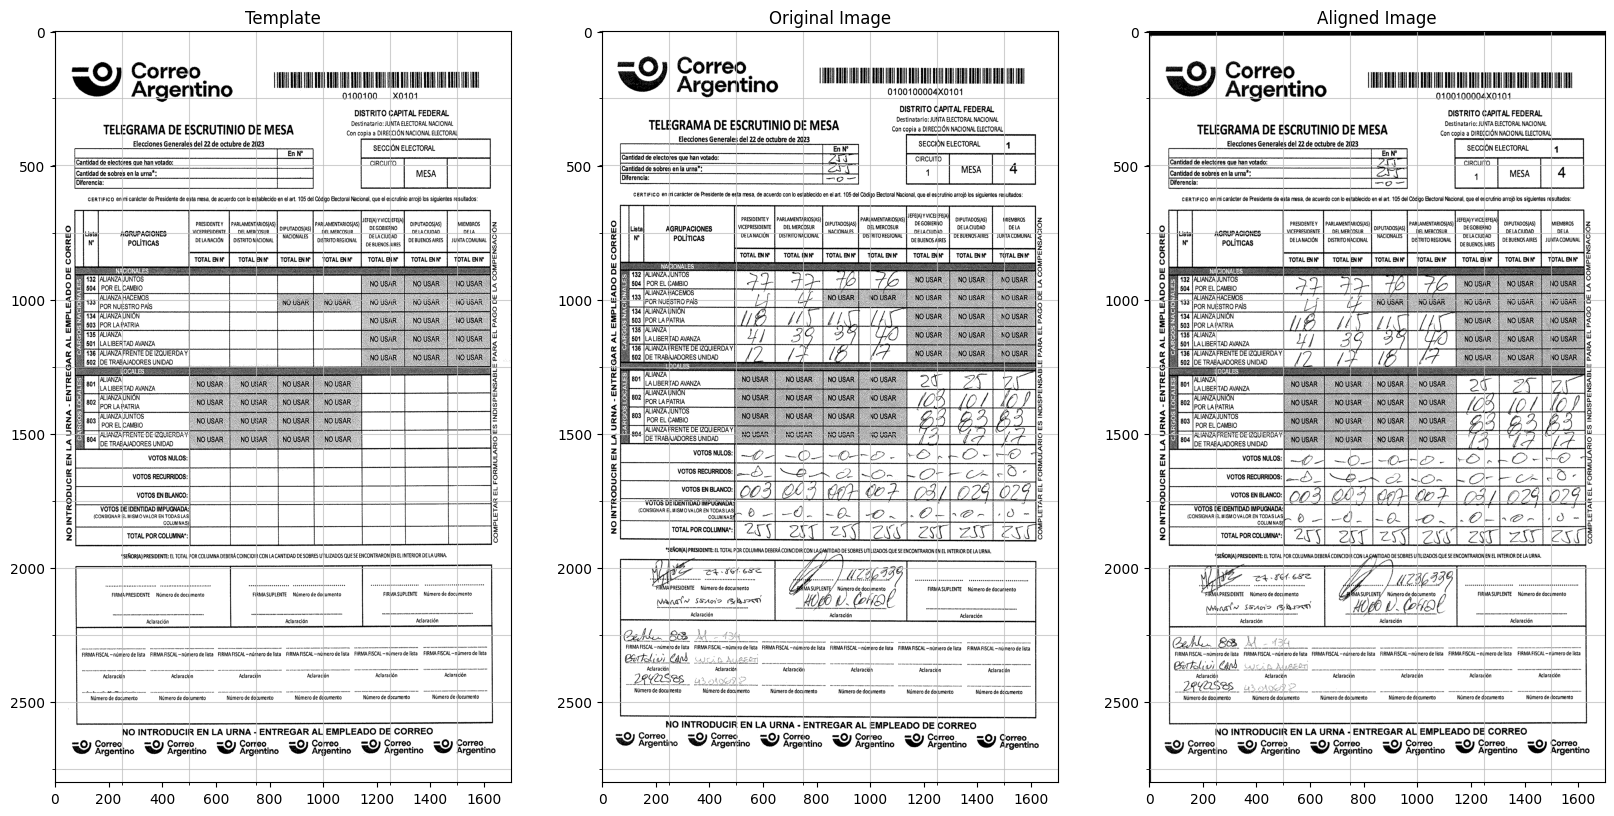

In [11]:
import matplotlib.pyplot as plt

# Crear la figura y los ejes
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

# Mostrar la imagen alineada
axes[0].imshow(processor.img_template, cmap='gray')
axes[0].set_title('Template')
axes[0].axis('on')

# Mostrar la imagen original
axes[1].imshow(processor.img, cmap='gray')
axes[1].set_title('Original Image')
axes[1].axis('on')

# Mostrar la imagen original
axes[2].imshow(processor.aligned_image, cmap='gray')
axes[2].set_title('Aligned Image')
axes[2].axis('on')

# Definir el espaciado de la cuadrícula
grid_color = '#bbbbbb'  # Un gris claro para la cuadrícula
grid_alpha = 0.7        # Transparencia de la cuadrícula
grid_spacing = 250      # Espaciado de la cuadrícula
grid_linewidth = 0.8    # Ancho de las líneas de la cuadrícula

# Dibujar la cuadrícula sobre la imagen alineada
axes[0].set_xticks(np.arange(-0.5, processor.img_template.shape[1], grid_spacing), minor=True)
axes[0].set_yticks(np.arange(-0.5, processor.img_template.shape[0], grid_spacing), minor=True)
axes[0].grid(which="minor", color=grid_color, linestyle='-', linewidth=grid_linewidth, alpha=grid_alpha)

# Dibujar la cuadrícula sobre la imagen original
axes[1].set_xticks(np.arange(-0.5, processor.img.shape[1], grid_spacing), minor=True)
axes[1].set_yticks(np.arange(-0.5, processor.img.shape[0], grid_spacing), minor=True)
axes[1].grid(which="minor", color=grid_color, linestyle='-', linewidth=grid_linewidth, alpha=grid_alpha)

# Dibujar la cuadrícula sobre la imagen original
axes[2].set_xticks(np.arange(-0.5, processor.aligned_image.shape[1], grid_spacing), minor=True)
axes[2].set_yticks(np.arange(-0.5, processor.aligned_image.shape[0], grid_spacing), minor=True)
axes[2].grid(which="minor", color=grid_color, linestyle='-', linewidth=grid_linewidth, alpha=grid_alpha)

# Mostrar las imágenes
plt.show()

In [12]:
from telegrama import Telegrama
from template import Template

aligned_binarizada = processor.binarize_aligned_image()
template_binarizada = processor.binarize_template_image()

# Crear instancias de Telegrama o Template con la imagen binarizada
telegrama = Telegrama(processor.aligned_image, aligned_binarizada)
template = Template(processor.img_template, template_binarizada)

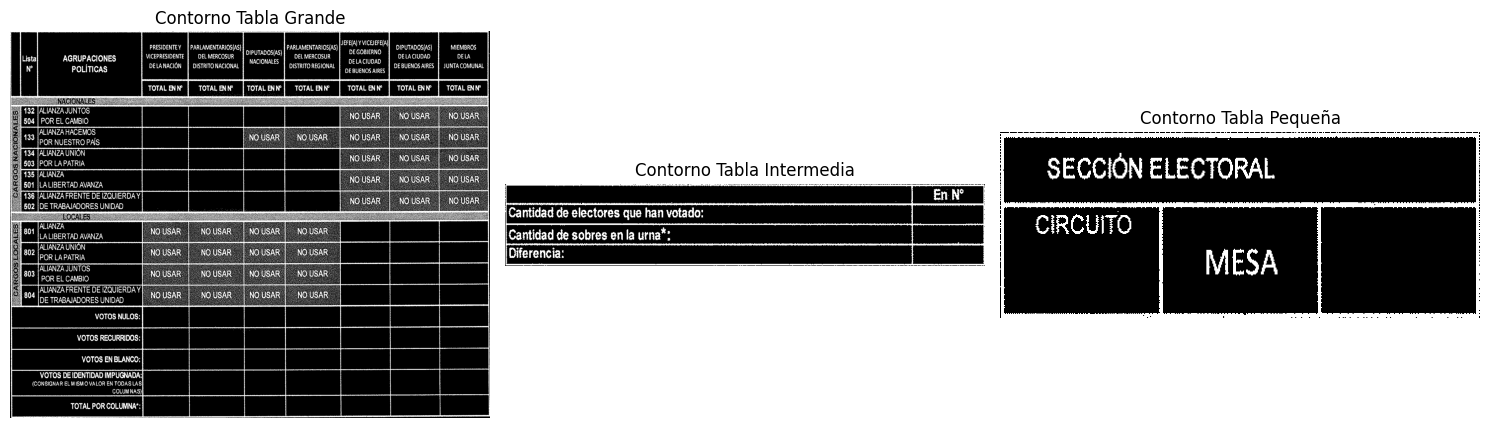

In [13]:
import cv2

# Configura una figura con 3 subplots (uno por cada recorte)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 fila, 3 columnas

# Subplot para la tabla grande
axes[0].imshow(template.tabla_grande.recorte, cmap='gray')
axes[0].set_title('Contorno Tabla Grande')
axes[0].axis('off')  # Desactiva los ejes

# Subplot para la tabla intermedia
axes[1].imshow(template.tabla_intermedia.recorte, cmap='gray')
axes[1].set_title('Contorno Tabla Intermedia')
axes[1].axis('off')  # Desactiva los ejes

# Subplot para la tabla pequeña
axes[2].imshow(template.tabla_pequena.recorte, cmap='gray')
axes[2].set_title('Contorno Tabla Pequeña')
axes[2].axis('off')  # Desactiva los ejes

# Ajustar el espacio entre los subplots para que no se superpongan los títulos
plt.tight_layout()
plt.show()

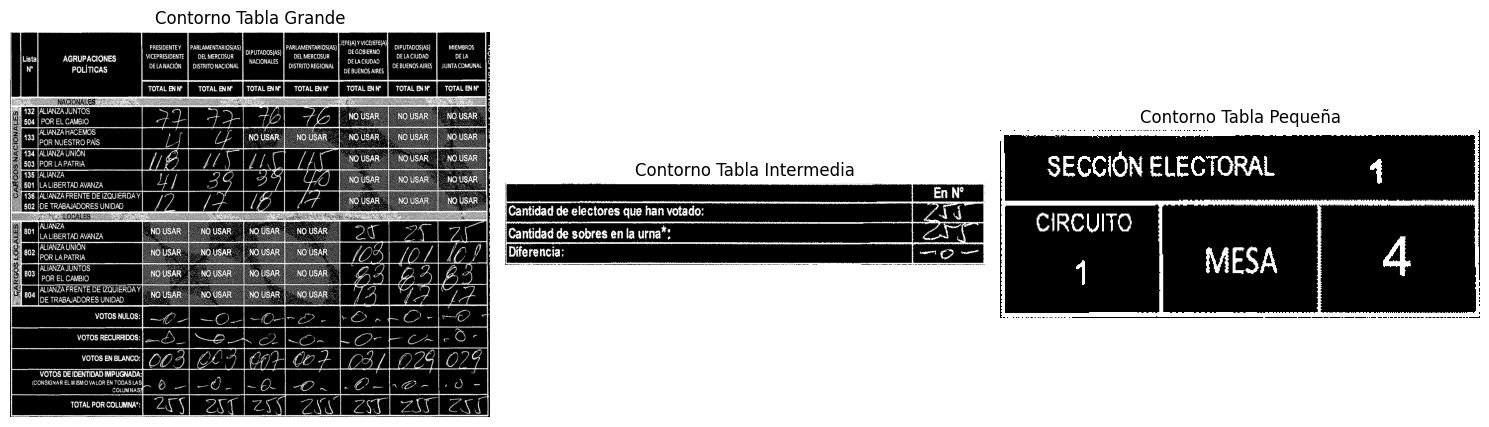

In [14]:
import cv2

# Configura una figura con 3 subplots (uno por cada recorte)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 fila, 3 columnas

# Subplot para la tabla grande
axes[0].imshow(telegrama.tabla_grande.recorte, cmap='gray')
axes[0].set_title('Contorno Tabla Grande')
axes[0].axis('off')  # Desactiva los ejes

# Subplot para la tabla intermedia
axes[1].imshow(telegrama.tabla_intermedia.recorte, cmap='gray')
axes[1].set_title('Contorno Tabla Intermedia')
axes[1].axis('off')  # Desactiva los ejes

# Subplot para la tabla pequeña
axes[2].imshow(telegrama.tabla_pequena.recorte, cmap='gray')
axes[2].set_title('Contorno Tabla Pequeña')
axes[2].axis('off')  # Desactiva los ejes

# Ajustar el espacio entre los subplots para que no se superpongan los títulos
plt.tight_layout()
plt.show()


### Deteccion celdas en Template

Advertencia: se detectaron 16 filas, pero se esperaban 17.


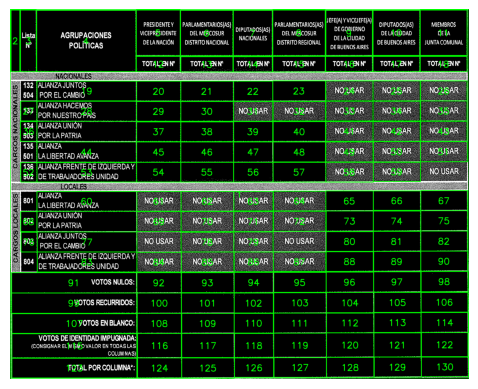

In [20]:
# Dibujar las celdas detectadas en 'tabla' y numerarlas después de ordenarlas
tabla_numerada = cv2.cvtColor(template.tabla_grande.recorte, cv2.COLOR_GRAY2BGR) 

# Procesa la tabla y recibe una lista de objetos Celda
celdas_procesadas = processor.process_table(template.tabla_grande.recorte)

# Dibuja los rectángulos y los números de ID en la imagen
for celda in celdas_procesadas:
    id_celda = celda.id
    x, y, w, h = celda.posicion
    
    # Dibujar un rectángulo alrededor de la celda
    cv2.rectangle(tabla_numerada, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    # Dibujar el número de ID de la celda
    font = cv2.FONT_HERSHEY_SIMPLEX
    text_size = cv2.getTextSize(str(id_celda), font, 1, 2)[0]
    text_x = x + (w - text_size[0]) // 2
    text_y = y + (h + text_size[1]) // 2
    cv2.putText(tabla_numerada, str(id_celda), (text_x, text_y), font, 1, (0, 255, 0), 2)

# Mostrar la tabla con las celdas numeradas con IDs en orden
plt.imshow(cv2.cvtColor(tabla_numerada, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### Deteccion celdas en Telegrama

Advertencia: se detectaron 16 filas, pero se esperaban 17.


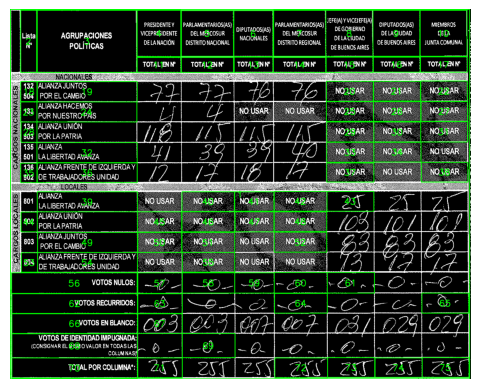

In [19]:
# Dibujar las celdas detectadas en 'tabla' y numerarlas después de ordenarlas
tabla_numerada = cv2.cvtColor(telegrama.tabla_grande.recorte, cv2.COLOR_GRAY2BGR) 

# Procesa la tabla y recibe una lista de objetos Celda
celdas_procesadas = processor.process_table(telegrama.tabla_grande.recorte)

# Dibuja los rectángulos y los números de ID en la imagen
for celda in celdas_procesadas:
    id_celda = celda.id
    x, y, w, h = celda.posicion
    
    # Dibujar un rectángulo alrededor de la celda
    cv2.rectangle(tabla_numerada, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    # Dibujar el número de ID de la celda
    font = cv2.FONT_HERSHEY_SIMPLEX
    text_size = cv2.getTextSize(str(id_celda), font, 1, 2)[0]
    text_x = x + (w - text_size[0]) // 2
    text_y = y + (h + text_size[1]) // 2
    cv2.putText(tabla_numerada, str(id_celda), (text_x, text_y), font, 1, (0, 255, 0), 2)

# Mostrar la tabla con las celdas numeradas con IDs en orden
plt.imshow(cv2.cvtColor(tabla_numerada, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### Deteccion de celdas combinando Telegrama con Template

Advertencia: se detectaron 16 filas, pero se esperaban 17.


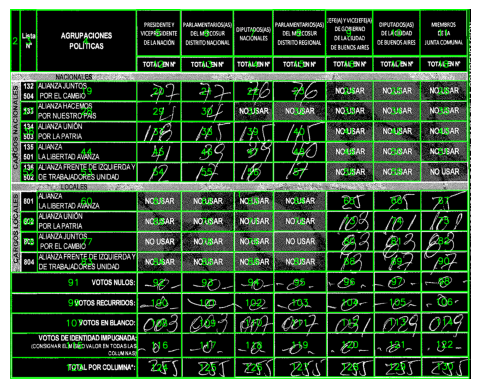

In [18]:
# Dibujar las celdas detectadas en 'tabla' y numerarlas después de ordenarlas
tabla_numerada = cv2.cvtColor(telegrama.tabla_grande.recorte, cv2.COLOR_GRAY2BGR) 

# Procesa la tabla y recibe una lista de objetos Celda
celdas_procesadas = processor.process_table(template.tabla_grande.recorte)

# Dibuja los rectángulos y los números de ID en la imagen
for celda in celdas_procesadas:
    id_celda = celda.id
    x, y, w, h = celda.posicion
    
    # Dibujar un rectángulo alrededor de la celda
    cv2.rectangle(tabla_numerada, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    # Dibujar el número de ID de la celda
    font = cv2.FONT_HERSHEY_SIMPLEX
    text_size = cv2.getTextSize(str(id_celda), font, 1, 2)[0]
    text_x = x + (w - text_size[0]) // 2
    text_y = y + (h + text_size[1]) // 2
    cv2.putText(tabla_numerada, str(id_celda), (text_x, text_y), font, 1, (0, 255, 0), 2)

# Mostrar la tabla con las celdas numeradas con IDs en orden
plt.imshow(cv2.cvtColor(tabla_numerada, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

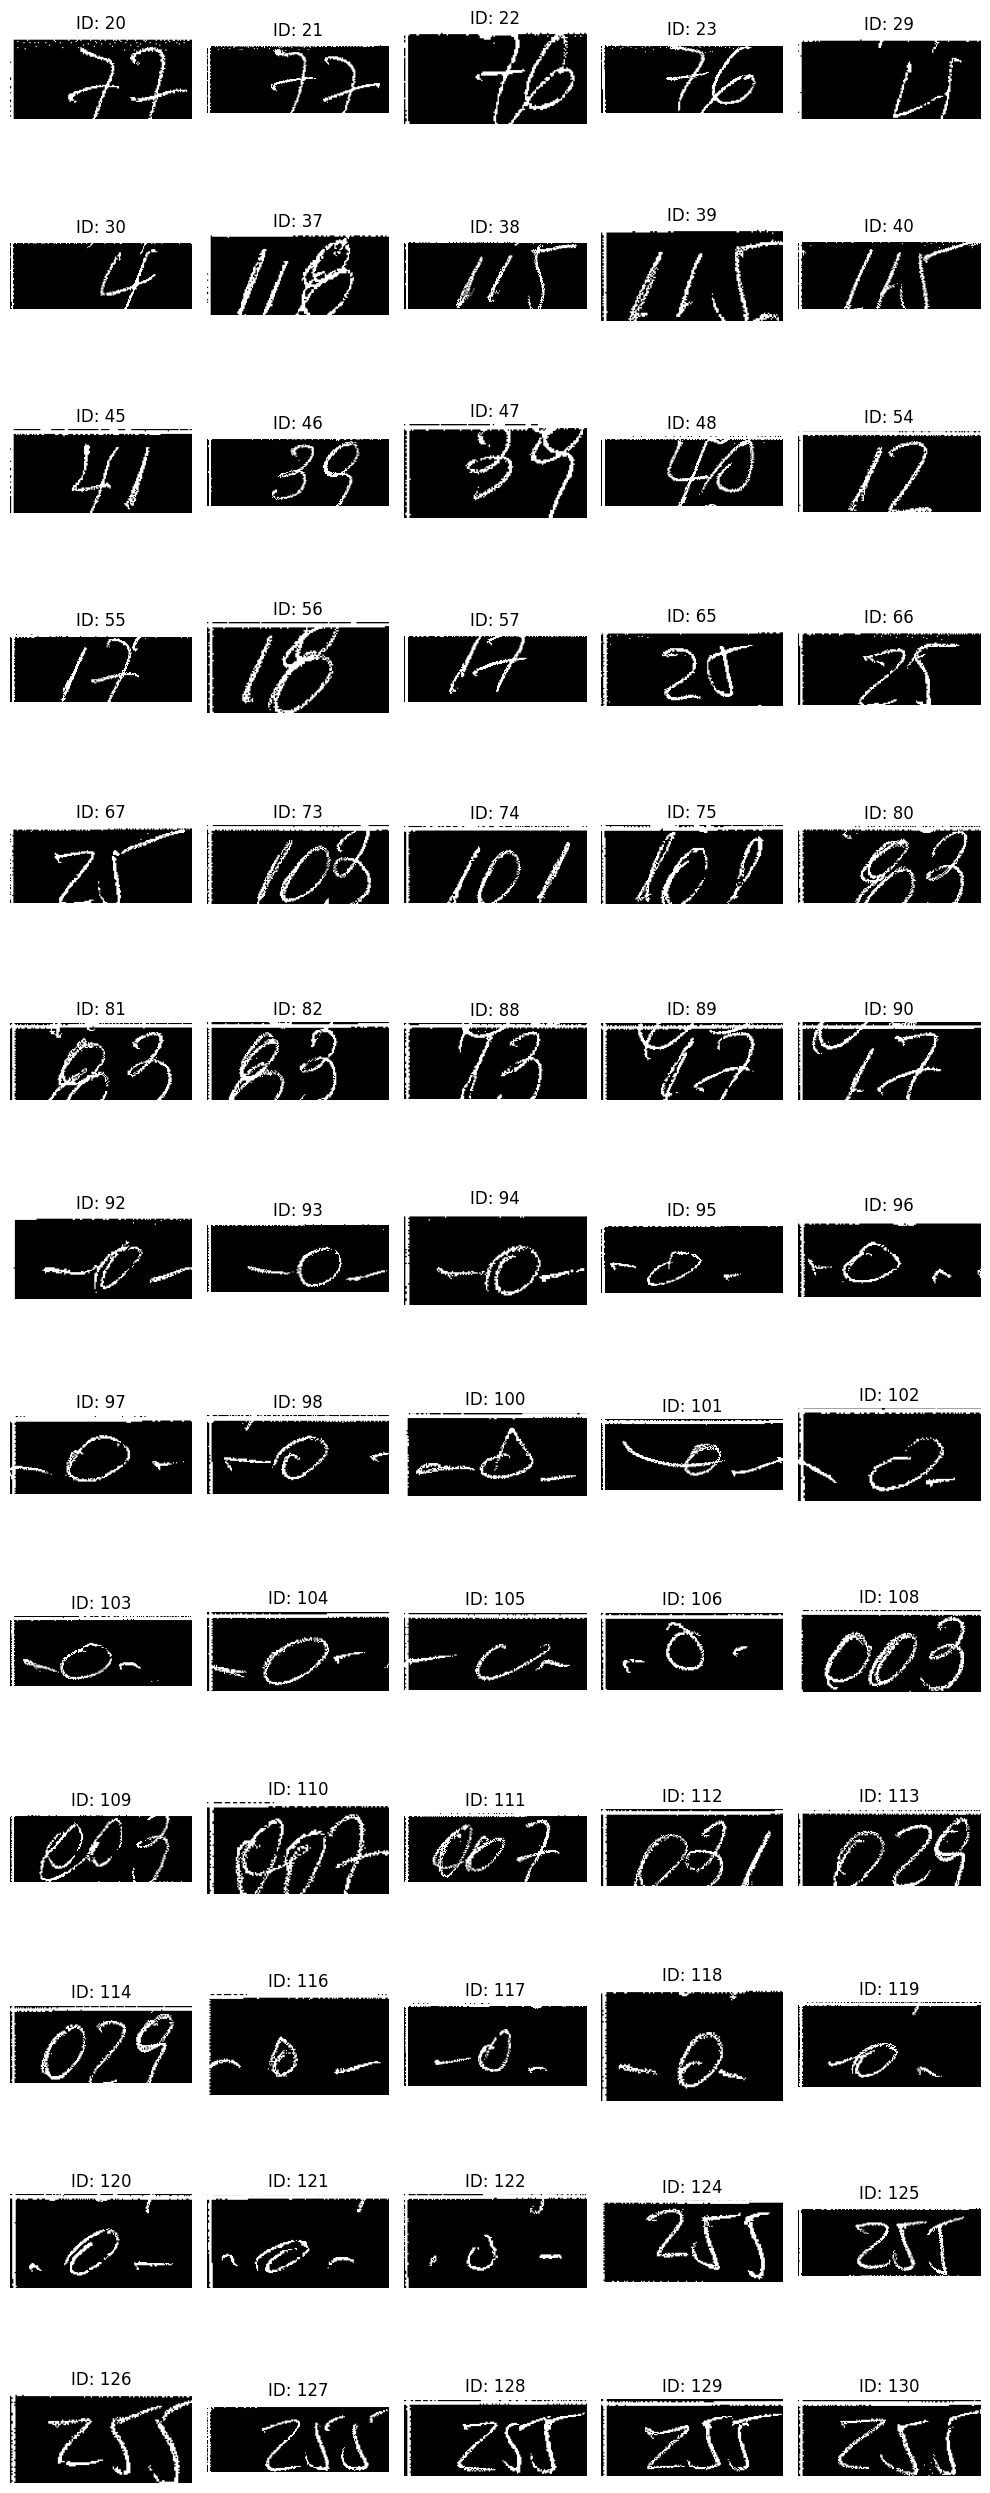

In [21]:
import math

# Lista de índices de las celdas que quieres extraer
indices_celdas_a_extraer = [20, 21, 22, 23, 29, 30, 37, 38, 39, 40, 45, 45, 46, 47, 48, 54, 55, 
                            56, 57, 65, 66, 67, 73, 74, 75, 80, 81, 82, 88, 89, 90, 92, 93, 94, 95,
                            96, 97, 98, 100, 101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 
                            112, 113, 114, 116, 117, 118, 119, 120, 121, 122, 124, 125, 126, 127, 
                            128, 129, 130]

imagenes_celdas_extraidas = processor.extract_cells_by_id(celdas_procesadas, indices_celdas_a_extraer, telegrama.tabla_grande.recorte)

# Define cuántas columnas quieres por fila
num_columnas_por_fila = math.ceil(len(imagenes_celdas_extraidas) / 14)

# Establece el tamaño de la figura
ancho_figura = num_columnas_por_fila * 2  # Puedes ajustar el factor para que las imágenes sean más anchas si es necesario
alto_figura = 14 * 2  # Asumiendo que quieres 2 pulgadas de alto por imagen
plt.figure(figsize=(ancho_figura, alto_figura))

# Ahora, itera sobre tus imágenes y crea un subplot para cada una
for i, (indice, img) in enumerate(imagenes_celdas_extraidas):
    # Determina la fila y la columna basándote en el índice 'i'
    fila = i // num_columnas_por_fila
    columna = i % num_columnas_por_fila
    # Crea un subplot en la posición correcta
    plt.subplot(14, num_columnas_por_fila, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f'ID: {indice}')
    plt.axis('off')

# Ajusta los subplots
plt.tight_layout()
plt.show()


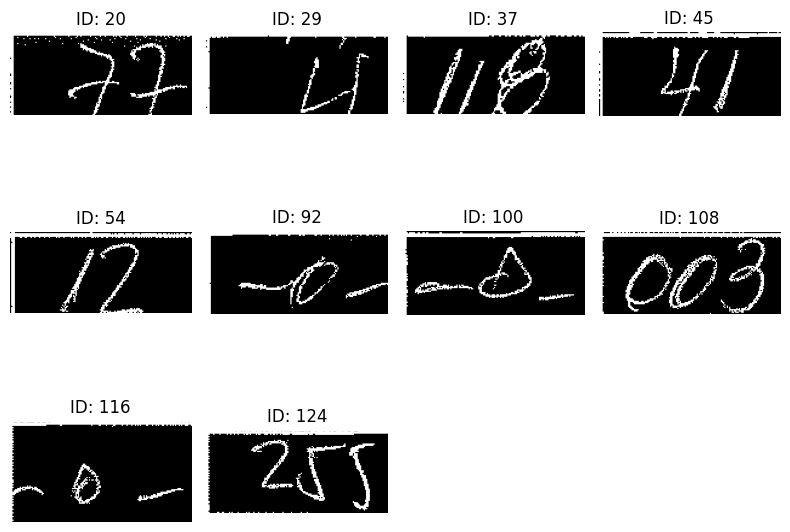

In [57]:
# Lista de índices de las celdas que quieres extraer
indices_celdas_a_extraer = [20, 29, 37, 45, 54, 92, 100, 108, 116, 124]

imagenes_celdas_extraidas = processor.extract_cells_by_id(celdas_procesadas, indices_celdas_a_extraer, telegrama.tabla_grande.recorte)

# Define cuántas columnas quieres por fila
num_columnas_por_fila = math.ceil(len(imagenes_celdas_extraidas) / 3)

# Establece el tamaño de la figura
ancho_figura = num_columnas_por_fila * 2  # Puedes ajustar el factor para que las imágenes sean más anchas si es necesario
alto_figura = 14 * 2  # Asumiendo que quieres 2 pulgadas de alto por imagen
plt.figure(figsize=(ancho_figura, alto_figura))

# Ahora, itera sobre tus imágenes y crea un subplot para cada una
for i, (indice, img) in enumerate(imagenes_celdas_extraidas):
    # Determina la fila y la columna basándote en el índice 'i'
    fila = i // num_columnas_por_fila
    columna = i % num_columnas_por_fila
    # Crea un subplot en la posición correcta
    plt.subplot(14, num_columnas_por_fila, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f'ID: {indice}')
    plt.axis('off')

# Ajusta los subplots
plt.tight_layout()
plt.show()


In [86]:
from election_data_downloader import ElectionDataDownloader

# Configurar las variables necesarias
folder_path = './election_results/electoral_scope_data/'

# Crear una instancia de la clase y obtener los datos
downloader = ElectionDataDownloader(folder_path, FILE_TELEGRAM)
json_data = downloader.get_or_download_data()

Datos leídos desde ./election_results/electoral_scope_data/0100100004X_scope_data.json


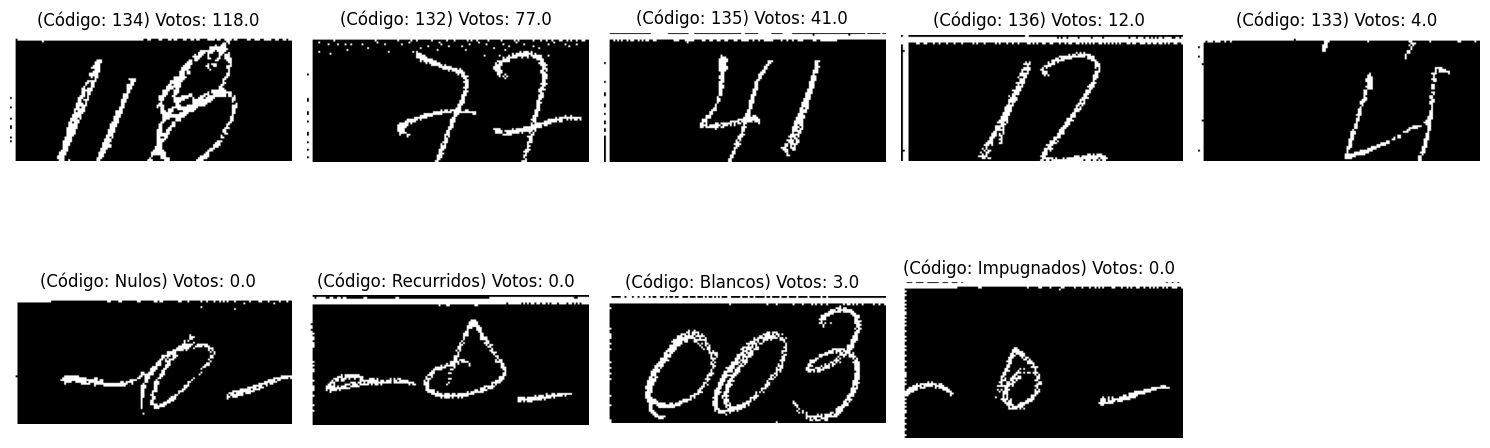

In [87]:
from scrutiny_data_processor import ScrutinyDataProcessor

mapeo_codigos_a_indices = {
        '132': 20,
        '133': 29,
        '134': 37,
        '135': 45,
        '136': 54,
        'Nulos': 92,
        'Recurridos': 100,
        'Blancos': 108,
        'Impugnados': 116,
        'Total': 124
    }
    
# Suponiendo que json_data, mapeo_codigos_a_indices y imagenes_celdas_extraidas ya están definidos
processor = ScrutinyDataProcessor(json_data, FILE_TELEGRAM, mapeo_codigos_a_indices, imagenes_celdas_extraidas)
resultados_info = processor.extract_info()

# Número de imágenes que quieres mostrar
numero_de_imagenes = len(resultados_info)  # Asegúrate de que esto refleje el número actual de imágenes

# Calcula cuántas filas y columnas necesitas
num_columnas_por_fila = 5  # o cualquier otro número de columnas que prefieras
num_filas = math.ceil(numero_de_imagenes / num_columnas_por_fila)

# Establece el tamaño de la figura
ancho_figura = num_columnas_por_fila * 3  # Ajusta el ancho como sea necesario
alto_figura = num_filas * 3  # Ajusta el alto como sea necesario
plt.figure(figsize=(ancho_figura, alto_figura))

# Crea los subplots
for i, (codigo, info) in enumerate(resultados_info.items(), start=1):  # Comienza la enumeración en 1
    plt.subplot(num_filas, num_columnas_por_fila, i)
    if info.get("imagen") is not None:
        plt.imshow(info["imagen"], cmap='gray')
    plt.title(f"(Código: {codigo}) Votos: {info['votos']} ")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [2]:
# Extrae los votos de los partidos y otros datos relevantes
votos_partidos = {codigo: info['votos'] for codigo, info in resultados_info.items() if codigo.isdigit()}
votos_en_blanco = resultados_info['Blancos']['votos']
votos_nulos = resultados_info['Nulos']['votos']
votos_recurridos = resultados_info['Recurridos']['votos']
votos_impugnados = resultados_info['Impugnados']['votos']
total_votantes = resultados_info['Total']['votos']

# Uso del método de validación
resultado = validar_telegrama(
    votos_partidos=votos_partidos,
    votos_en_blanco=votos_en_blanco,
    votos_nulos=votos_nulos,
    votos_recurridos=votos_recurridos,
    votos_impugnados=votos_impugnados,
    total_votantes=total_votantes
)

if resultado == ResultadoValidacion.VALIDO:
    print("La validación de los datos es correcta.")
else:
    print(f"Error en la validación: {resultado.name}")

NameError: name 'resultados_info' is not defined